In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
# Lecture du fichier
df = pd.read_excel('data.xlsx')

In [7]:
# Affichage de la db
df

,IDEN,pain,légumes,fruits,viande,volaille,lait,vin
0,MA2,332,428,354,1437,526,247,427
1,EM2,293,559,388,1527,567,239,258
2,CA2,372,767,562,1948,927,235,433
3,MA3,406,563,341,1507,544,324,407
4,EM3,386,608,396,1501,568,319,363
5,CA3,438,843,689,2345,1148,243,341
6,MA4,534,660,367,1620,638,414,407
7,EM4,460,699,484,1856,762,400,416
8,CA4,385,789,621,2366,1149,304,282
9,MA5,655,776,423,1848,759,495,486


In [8]:
# Description statistique
df.describe()

,pain,légumes,fruits,viande,volaille,lait,vin
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,446.666667,732.000000,505.000000,1886.750000,804.000000,358.250000,368.583333
std,107.147590,189.180049,165.092261,395.750409,248.682711,117.127068,71.781814
min,293.000000,428.000000,341.000000,1437.000000,526.000000,235.000000,258.000000
25%,381.750000,596.750000,382.750000,1522.000000,567.750000,246.000000,310.250000
50%,422.000000,733.000000,453.500000,1852.000000,760.500000,321.500000,385.000000
75%,519.750000,802.500000,576.750000,2128.250000,982.250000,434.250000,418.750000
max,655.000000,1097.000000,887.000000,2630.000000,1167.000000,561.000000,486.000000


# 1.Commentaire du tableau des statistiques sommaires


On constate que:<br>
 - les variables sont héterogenes a cause de la difference entre les differentes des variables(par exemple viande varie entre 1800-2600 tandis que lait varie entre 240-560):Ce qui nous poussera à standariser nos données avant l'ACP.

 - Viande,vollaille et légume ont des ecart-types important du à la grande variabilité entre les catégories socio-professionelles.

 - les moyenne et  médianes des differentes variables sont aussi proches,pas de valeur extreme sauf CA5 qui a des plus grandes valeurs au niveau de la viande,legumes et vollailes. 

 Ce qui nous pousse a dire les variables sont sur des echelles differentes et presentent des grandes variabilité.

# 2.Ce qu'ont peut dire des correlations

In [9]:
df.iloc[:,1:]

,pain,légumes,fruits,viande,volaille,lait,vin
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,568,319,363
5,438,843,689,2345,1148,243,341
6,534,660,367,1620,638,414,407
7,460,699,484,1856,762,400,416
8,385,789,621,2366,1149,304,282
9,655,776,423,1848,759,495,486


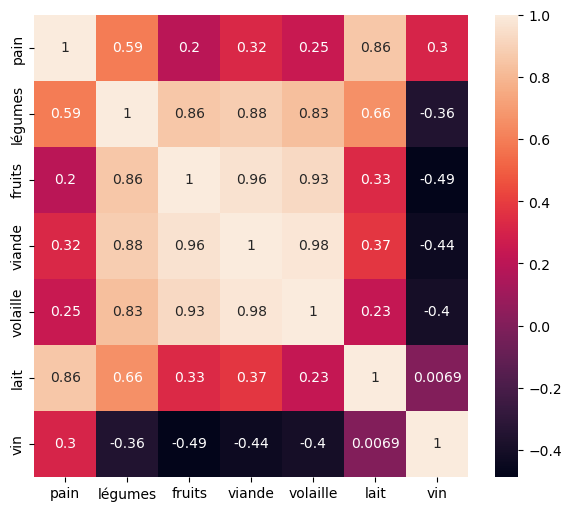

In [10]:
#Trouvons les correlations entre les differentes variables
cols = df.columns[1:]              
corr = df.iloc[:,1:].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr,
            annot=True,)
plt.show()


Corrélations fortes : viande et volaille sont fortement corrélées entre elles (les catégories qui dépensent beaucoup en viande dépensent aussi beaucoup en volaille). De même viande est fortement corrélée avec légumes et légumes corrèle positivement avec fruits.

Variables moins corrélées : lait et vin sont moins corrélés avec avec les autres variables.

# 3.Application de l’algorithme de l’ACP à ce jeu de données


a.Standardisation des données

In [11]:

X = df.iloc[:,1:].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
print(pd.DataFrame(X_standardized, index=df['IDEN'], columns=cols))

          pain   légumes    fruits    viande  volaille      lait       vin
IDEN                                                                      
MA2  -1.117761 -1.678389 -0.955310 -1.186982 -1.167598 -0.992058  0.849995
EM2  -1.497930 -0.955136 -0.740207 -0.949454 -0.995399 -1.063397 -1.609050
CA2  -0.727845  0.193236  0.360614  0.161651  0.516599 -1.099066  0.937299
MA3  -0.396415 -0.933052 -1.037556 -1.002238 -1.091998 -0.305420  0.558984
EM3  -0.591374 -0.684606 -0.689595 -1.018073 -0.991199 -0.350007 -0.081241
CA3  -0.084482  0.612833  1.164087  1.209415  1.444798 -1.027727 -0.401353
MA4   0.851318 -0.397513 -0.873065 -0.704008 -0.697199  0.497144  0.558984
EM4   0.129972 -0.182194 -0.132858 -0.081156 -0.176400  0.372300  0.689939
CA4  -0.601122  0.314698  0.733881  1.264838  1.448998 -0.483768 -1.259836
MA5   2.030816  0.242925 -0.518778 -0.102269 -0.189000  1.219451  1.708479
EM5   1.338714  1.452027  0.272042  0.446685  0.373799  1.424551 -0.721466
CA5   0.666108  2.015171 

b.La matrice de covariance

In [12]:
M_cov = np.cov(X_standardized,rowvar=False,ddof=0)
M_cov

array([[ 1.        ,  0.59311021,  0.19613878,  0.32126911,  0.24681402,
         0.8555748 ,  0.30376123],
       [ 0.59311021,  1.        ,  0.85625022,  0.88108065,  0.82730007,
         0.66279874, -0.35646825],
       [ 0.19613878,  0.85625022,  1.        ,  0.95947671,  0.9263958 ,
         0.33218856, -0.48628058],
       [ 0.32126911,  0.88108065,  0.95947671,  1.        ,  0.98168805,
         0.37459064, -0.43723528],
       [ 0.24681402,  0.82730007,  0.9263958 ,  0.98168805,  1.        ,
         0.23248901, -0.40185403],
       [ 0.8555748 ,  0.66279874,  0.33218856,  0.37459064,  0.23248901,
         1.        ,  0.0068796 ],
       [ 0.30376123, -0.35646825, -0.48628058, -0.43723528, -0.40185403,
         0.0068796 ,  1.        ]])

In [13]:
df_R = pd.DataFrame(M_cov, index=cols, columns=cols)
df_R

,pain,légumes,fruits,viande,volaille,lait,vin
pain,1.000000,0.593110,0.196139,0.321269,0.246814,0.855575,0.303761
légumes,0.593110,1.000000,0.856250,0.881081,0.827300,0.662799,-0.356468
fruits,0.196139,0.856250,1.000000,0.959477,0.926396,0.332189,-0.486281
viande,0.321269,0.881081,0.959477,1.000000,0.981688,0.374591,-0.437235
volaille,0.246814,0.827300,0.926396,0.981688,1.000000,0.232489,-0.401854
lait,0.855575,0.662799,0.332189,0.374591,0.232489,1.000000,0.006880
vin,0.303761,-0.356468,-0.486281,-0.437235,-0.401854,0.006880,1.000000


c. Determinons la metrique M = d/variance 


Etant donné que nos données sont homogene M = I7

d.Etude spectrale

In [14]:
# Etude spectrale
valeurs_propres, vecteurs_propres = np.linalg.eig(M_cov)

In [15]:
print(np.round(valeurs_propres, 2))

[4.33 1.83 0.63 0.13 0.06 0.02 0.  ]


In [16]:
print(np.round(vecteurs_propres, 2))

[[ 0.24  0.62  0.01 -0.54  0.04 -0.51 -0.02]
 [ 0.47  0.1   0.06 -0.03 -0.81  0.3   0.16]
 [ 0.45 -0.21 -0.15  0.55 -0.07 -0.63 -0.2 ]
 [ 0.46 -0.14 -0.21 -0.05  0.42  0.1   0.73]
 [ 0.44 -0.2  -0.35 -0.32  0.22  0.35 -0.61]
 [ 0.28  0.52  0.44  0.45  0.34  0.33 -0.15]
 [-0.21  0.48 -0.78  0.31 -0.07  0.14  0.04]]


In [17]:
# Verifions si le normes des vecteurs propres sont egales a 1
u1 = vecteurs_propres[:,0:1]
u2 = vecteurs_propres[:,1:2]
u3 = vecteurs_propres[:,2:3]
u4 = vecteurs_propres[:,3:4]
u5 = vecteurs_propres[:,4:5]
u6 = vecteurs_propres[:,5:6]
u7 = vecteurs_propres[:,6:7]


n_u1=np.linalg.norm(u1)
n_u2=np.linalg.norm(u2)
n_u3=np.linalg.norm(u3)
n_u4=np.linalg.norm(u4)
n_u5=np.linalg.norm(u5)
n_u6=np.linalg.norm(u6)
n_u7=np.linalg.norm(u7)
print("n_=u1=",n_u1,"\nn_u2=",n_u2,"\nn_u3=",n_u3,"\nn_u4=",n_u4,"\nn_u5=",n_u5,"\nn_u6=",n_u6,"\nn_u7=",n_u7)


n_=u1= 1.0 
n_u2= 0.9999999999999999 
n_u3= 1.0 
n_u4= 1.0 
n_u5= 0.9999999999999999 
n_u6= 0.9999999999999998 
n_u7= 0.9999999999999999


In [18]:
# Trouvons la quantites de representation de chaque composante 
total_variance = np.sum(valeurs_propres)
v1 = valeurs_propres[0] / total_variance * 100
v2 = valeurs_propres[1] / total_variance * 100
v3 = valeurs_propres[2] / total_variance * 100
v4 = valeurs_propres[3] / total_variance * 100
v5 = valeurs_propres[4] / total_variance * 100
v6 = valeurs_propres[5] / total_variance * 100
v7 = valeurs_propres[6] / total_variance * 100
print(f"Composante 1: {v1:.2f}%, Composante 2: {v2:.2f}%, Composante 3: {v3:.2f}%, Composante 4: {v4:.2f}%, Composante 5: {v5:.2f}%, Composante 6: {v6:.2f}%, Composante 7: {v7:.2f}%")

Composante 1: 61.91%, Composante 2: 26.16%, Composante 3: 9.00%, Composante 4: 1.83%, Composante 5: 0.82%, Composante 6: 0.27%, Composante 7: 0.02%


On retient alors deux axes

In [19]:
CP1 = X_standardized @ u1
CP2 = X_standardized @ u2

coord = np.hstack((CP1, CP2))
coord_df = pd.DataFrame(coord, index=df['IDEN'], columns=['CP1', 'CP2'])
coord_df

,CP1,CP2
IDEN,,
MA2,-2.989033,-0.379427
EM2,-1.975514,-1.870755
CA2,-0.123682,-0.757975
MA3,-2.134834,0.338428
EM3,-1.754270,-0.177184
CA3,1.770773,-1.415208
MA4,-0.977431,1.433504
EM4,-0.265448,0.661259
CA4,1.673047,-1.813237


C:\Users\HACK LAB\AppData\Local\Temp\ipykernel_4892\525363560.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (coord_df['CP1'][i], coord_df['CP2'][i]))


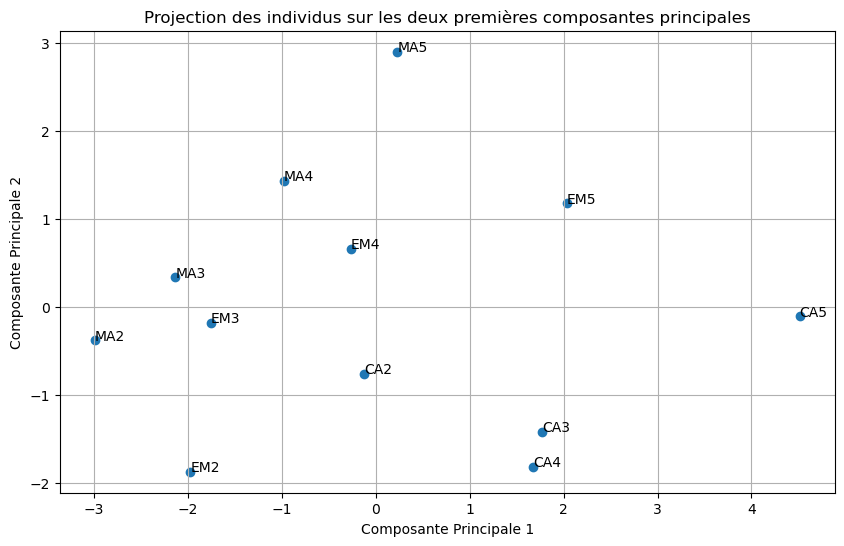

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(coord_df['CP1'], coord_df['CP2'])
for i, txt in enumerate(coord_df.index):
    plt.annotate(txt, (coord_df['CP1'][i], coord_df['CP2'][i]))
plt.title('Projection des individus sur les deux premières composantes principales')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.show()


In [21]:
# Contribution de chaque individu aux composantes principales
contrib_cp1 = (CP1 ** 2) / np.sum(CP1 ** 2) * 100
contrib_cp2 = (CP2 ** 2) / np.sum(CP2 ** 2) * 100
contrib_to = contrib_cp1 + contrib_cp2
contrib_df = pd.DataFrame({'Contrib_CP1': contrib_cp1.flatten(), 'Contrib_CP2': contrib_cp2.flatten(),'Contrib_total': contrib_to.flatten()}, index=df['IDEN'])
contrib_df

,Contrib_CP1,Contrib_CP2,Contrib_total
IDEN,,,
MA2,17.179924,0.655209,17.835134
EM2,7.504467,15.927854,23.432320
CA2,0.029415,2.614767,2.644182
MA3,8.763710,0.521263,9.284973
EM3,5.917698,0.142881,6.060579
CA3,6.029559,9.115161,15.144720
MA4,1.837098,9.352360,11.189458
EM4,0.135493,1.990061,2.125554
CA4,5.382404,14.963480,20.345884


# UTILISATION DE SCIKIT-LEARN

In [22]:
from sklearn.decomposition import PCA 
acp = PCA()

In [23]:
#coordonnées factorielles
coord = acp.fit_transform(X_standardized)

In [24]:
#afficher les nouvelles coordonnées 

print(pd.DataFrame(coord, index=df['IDEN'], columns=cols))

          pain   légumes    fruits    viande  volaille      lait       vin
IDEN                                                                      
MA2  -2.989033 -0.379427  0.418806  0.380114 -0.233362  0.069086 -0.021894
EM2  -1.975514 -1.870755 -1.367490 -0.165144  0.097680  0.076795  0.031663
CA2  -0.123682 -0.757975  1.484468  0.202784  0.465104 -0.159996 -0.010613
MA3  -2.134834  0.338428 -0.113416  0.110467 -0.009908 -0.070778  0.068658
EM3  -1.754270 -0.177184 -0.523213  0.153064  0.176994  0.044485 -0.051534
CA3   1.770773 -1.415208  1.039224 -0.450268  0.074774  0.279747  0.014260
MA4  -0.977431  1.433504 -0.289905 -0.273158 -0.097690  0.071370 -0.052232
EM4  -0.265448  0.661259  0.284388  0.301416 -0.166142 -0.112956  0.015796
CA4   1.673047 -1.813237  0.101947 -0.416810 -0.440487 -0.232913 -0.016615
MA5   0.227912  2.900909  0.591651 -0.256496 -0.128591  0.065845  0.023805
EM5   2.036628  1.182972 -1.033760 -0.338331  0.340918 -0.130443 -0.003257
CA5   4.511852 -0.103286 

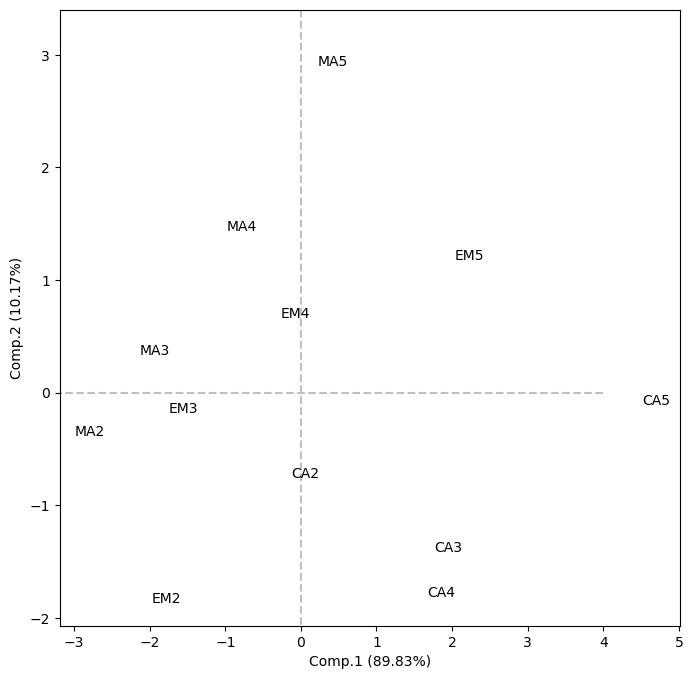

In [25]:
# Representation dans le repere factoriel
fig, ax = plt.subplots(figsize=(8,8)) 
ax.plot(coord[:,0],coord[:,1],"wo") 
ax.axis([-4,+6,-4,+4]) 
ax.plot([-4,+4],[0,0],color='silver',linestyle='--') 
ax.plot([0,0],[-4,+4],color='silver',linestyle='--') 
ax.set_xlabel("Comp.1 (89.83%)") 
ax.set_ylabel("Comp.2 (10.17%)")
n = coord.shape[0]
D = df.set_index('IDEN')
x_min, x_max = coord[:,0].min() - 0.2, coord[:,0].max() + 0.5
y_min, y_max = coord[:,1].min() - 0.2, coord[:,1].max() + 0.5
ax.axis([x_min, x_max, y_min, y_max])
for i in range(n): 
    ax.text(coord[i,0],coord[i,1],D.index[i])
    
plt.show()

# UTILISATION DE FANALYSIS

In [26]:
# importation de fanalysis
from fanalysis.pca import PCA


Nous ramenons la variable X_standatarize qui est notre matrice reduite-centrée pour que l'analyse porte sur nos 7 variables

In [27]:
X_standardized

array([[-1.11776128, -1.67838864, -0.95531042, -1.18698185, -1.16759838,
        -0.99205792,  0.8499955 ],
       [-1.49793009, -0.95513564, -0.74020741, -0.94945352, -0.99539862,
        -1.06339692, -1.60904996],
       [-0.72784455,  0.19323553,  0.36061387,  0.16165123,  0.51659928,
        -1.09906642,  0.93729889],
       [-0.39641534, -0.93305158, -1.03755568, -1.0022376 , -1.09199848,
        -0.30542008,  0.5589842 ],
       [-0.5913737 , -0.68460589, -0.68959494, -1.01807282, -0.99119862,
        -0.35000695, -0.08124065],
       [-0.08448196,  0.61283269,  1.16408686,  1.20941509,  1.44479799,
        -1.02772742, -0.40135308],
       [ 0.85131818, -0.3975131 , -0.87306515, -0.70400758, -0.69719903,
         0.49714363,  0.5589842 ],
       [ 0.12997224, -0.1821935 , -0.13285774, -0.08115551, -0.17639975,
         0.37230039,  0.68993928],
       [-0.60112162,  0.31469787,  0.73388085,  1.26483836,  1.44899799,
        -0.48376757, -1.25983641],
       [ 2.03081628,  0.2429

Creons une instance de la classe PCA en lui passant les etiquettes pour les lignes et variables pour que le programme ne détermine pas automatiquement les étiquettes

In [55]:
my_pca = PCA(std_unit=True, row_labels=df["IDEN"].values, col_labels=cols)

In [57]:
my_pca

PCA(col_labels=Index(['pain', 'légumes', 'fruits', 'viande', 'volaille', 'lait', 'vin'], dtype='object'),
    row_labels=array(['MA2', 'EM2', 'CA2', 'MA3', 'EM3', 'CA3', 'MA4', 'EM4', 'CA4',
       'MA5', 'EM5', 'CA5'], dtype=object))

Estimonsle modèle en appliquant la méthode fit de la classe PCA sur le jeu de données.

In [58]:
my_pca.fit(X_standardized)

PCA(col_labels=Index(['pain', 'légumes', 'fruits', 'viande', 'volaille', 'lait', 'vin'], dtype='object'),
    row_labels=array(['MA2', 'EM2', 'CA2', 'MA3', 'EM3', 'CA3', 'MA4', 'EM4', 'CA4',
       'MA5', 'EM5', 'CA5'], dtype=object))

In [59]:
print(my_pca.eig_)

[[4.33370137e+00 1.83102888e+00 6.30082937e-01 1.28063246e-01
  5.72966957e-02 1.87433259e-02 1.08355266e-03]
 [6.19100195e+01 2.61575554e+01 9.00118481e+00 1.82947495e+00
  8.18524225e-01 2.67761799e-01 1.54793236e-02]
 [6.19100195e+01 8.80675749e+01 9.70687597e+01 9.88982347e+01
  9.97167589e+01 9.99845207e+01 1.00000000e+02]]


Interpretation des valeurs propres retournées par la methode my_pca

- En 1ère ligne : les valeurs propres en valeur absolue
- En 2ème ligne : les valeurs propres en pourcentage de la variance totale
- En 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

Répresentation graphique des valeurs propres

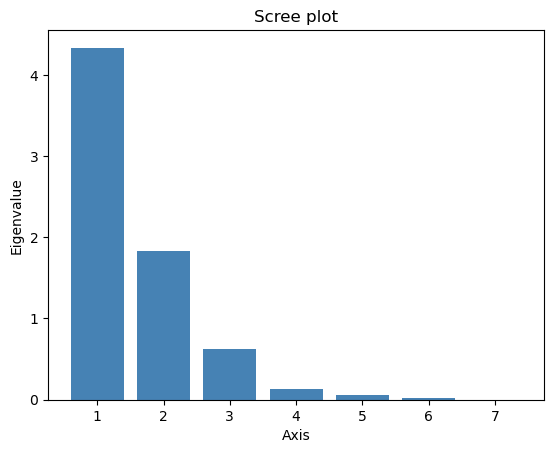

In [60]:
# Representation graphique des valeurs propres en valeurs absolues
my_pca.plot_eigenvalues()

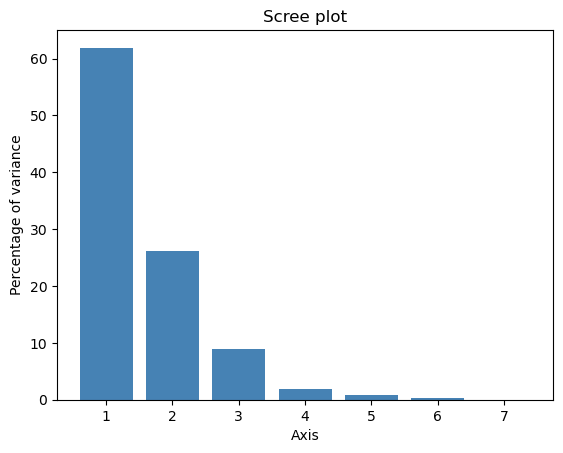

In [61]:
# Representation graphique des valeurs propres en pourcentage de la variaence totale
my_pca.plot_eigenvalues(type="percentage")

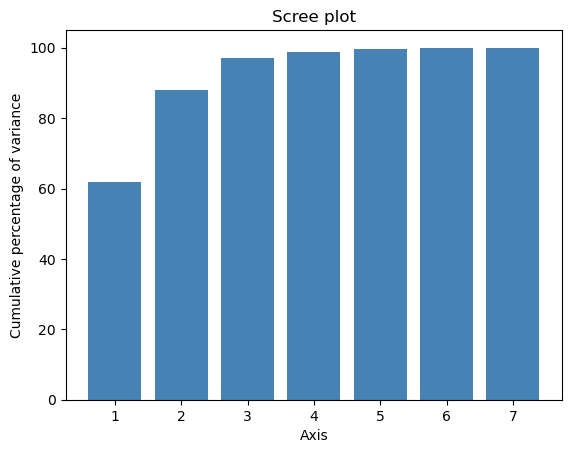

In [62]:
# Representation graphique des valeurs propres en pourcentage cumule de la variaence totale
my_pca.plot_eigenvalues(type="cumulative")

In [63]:
# Extraction des coordonnées, les contributions et les cos2 de chacun des points lignes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.). dans un DataFrame pandas
df_rows = my_pca.row_topandas()
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,...,row_contrib_dim5,row_contrib_dim6,row_contrib_dim7,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5,row_cos2_dim6,row_cos2_dim7
MA2,-2.989033,0.379427,-0.418806,0.380114,0.233362,-0.069086,-0.021894,17.179924,0.655209,2.319781,...,7.920457,2.122017,3.686645,0.944643,0.015222,0.018545,0.015277,0.005758,0.000505,5.068376e-05
EM2,-1.975514,1.870755,1.367490,-0.165144,-0.097680,-0.076795,0.031663,7.504467,15.927854,24.732584,...,1.387715,2.622004,7.710564,0.418914,0.375663,0.200730,0.002927,0.001024,0.000633,1.076174e-04
CA2,-0.123682,0.757975,-1.484468,0.202784,-0.465104,0.159996,-0.010613,0.029415,2.614767,29.144902,...,31.462217,11.381242,0.866288,0.004972,0.186739,0.716255,0.013366,0.070311,0.008320,3.661165e-05
MA3,-2.134834,-0.338428,0.113416,0.110467,0.009908,0.070778,0.068658,8.763710,0.521263,0.170126,...,0.014279,2.227272,36.254081,0.968255,0.024333,0.002733,0.002593,0.000021,0.001064,1.001497e-03
EM3,-1.754270,0.177184,0.523213,0.153064,-0.176994,-0.044485,-0.051534,5.917698,0.142881,3.620586,...,4.556232,0.879829,20.425106,0.894092,0.009121,0.079533,0.006807,0.009101,0.000575,7.715864e-04
CA3,1.770773,1.415208,-1.039224,-0.450268,-0.074774,-0.279747,0.014260,6.029559,9.115161,14.283669,...,0.813194,34.793951,1.563794,0.482018,0.307877,0.166018,0.031166,0.000859,0.012030,3.125704e-05
MA4,-0.977431,-1.433504,0.289905,-0.273158,0.097690,-0.071370,-0.052232,1.837098,9.352360,1.111556,...,1.387993,2.264646,20.982098,0.299835,0.644921,0.026377,0.023417,0.002995,0.001599,8.562279e-04
EM4,-0.265448,-0.661259,-0.284388,0.301416,0.166142,0.112956,0.015796,0.135493,1.990061,1.069657,...,4.014630,5.672687,1.919028,0.097856,0.607255,0.112319,0.126171,0.038334,0.017719,3.465299e-04
CA4,1.673047,1.813237,-0.101947,-0.416810,0.440487,0.232913,-0.016615,5.382404,14.963480,0.137459,...,28.219957,24.119077,2.122998,0.429335,0.504300,0.001594,0.026647,0.029761,0.008321,4.234093e-05
MA5,0.227912,-2.900909,-0.591651,-0.256496,0.128591,-0.065845,0.023805,0.099884,38.299393,4.629692,...,2.404958,1.927622,4.358136,0.005833,0.945059,0.039312,0.007388,0.001857,0.000487,6.363890e-05


In [64]:
# Coordonnées des points lignes
print(my_pca.row_coord_)

[[-2.98903318e+00  3.79427008e-01 -4.18806122e-01  3.80114346e-01
   2.33362217e-01 -6.90857281e-02 -2.18943129e-02]
 [-1.97551362e+00  1.87075472e+00  1.36749021e+00 -1.65144456e-01
  -9.76799780e-02 -7.67945854e-02  3.16634846e-02]
 [-1.23682475e-01  7.57974641e-01 -1.48446781e+00  2.02784396e-01
  -4.65104001e-01  1.59995870e-01 -1.06132091e-02]
 [-2.13483400e+00 -3.38428300e-01  1.13416285e-01  1.10466618e-01
   9.90836018e-03  7.07783784e-02  6.86584643e-02]
 [-1.75427032e+00  1.77184437e-01  5.23213474e-01  1.53063946e-01
  -1.76993919e-01 -4.44849514e-02 -5.15344675e-02]
 [ 1.77077301e+00  1.41520837e+00 -1.03922448e+00 -4.50267722e-01
  -7.47743177e-02 -2.79747249e-01  1.42595351e-02]
 [-9.77431323e-01 -1.43350373e+00  2.89904653e-01 -2.73158489e-01
   9.76897708e-02 -7.13697433e-02 -5.22324129e-02]
 [-2.65447523e-01 -6.61258672e-01 -2.84388314e-01  3.01416089e-01
   1.66141511e-01  1.12955756e-01  1.57963338e-02]
 [ 1.67304741e+00  1.81323680e+00 -1.01947410e-01 -4.16810099e-0

In [65]:
# Contributions des points lignes
print(my_pca.row_contrib_)

[[1.71799243e+01 6.55209283e-01 2.31978149e+00 9.40205459e+00
  7.92045734e+00 2.12201659e+00 3.68664547e+00]
 [7.50446660e+00 1.59278538e+01 2.47325836e+01 1.77468895e+00
  1.38771500e+00 2.62200368e+00 7.71056406e+00]
 [2.94154912e-02 2.61476650e+00 2.91449023e+01 2.67585956e+00
  3.14622175e+01 1.13812415e+01 8.66287745e-01]
 [8.76370998e+00 5.21263008e-01 1.70126462e-01 7.94065563e-01
  1.42788341e-02 2.22727229e+00 3.62540813e+01]
 [5.91769807e+00 1.42881075e-01 3.62058605e+00 1.52454434e+00
  4.55623239e+00 8.79829133e-01 2.04251060e+01]
 [6.02955914e+00 9.11516081e+00 1.42836690e+01 1.31927666e+01
  8.13193867e-01 3.47939510e+01 1.56379373e+00]
 [1.83709780e+00 9.35235997e+00 1.11155615e+00 4.85538476e+00
  1.38799326e+00 2.26464622e+00 2.09820980e+01]
 [1.35493084e-01 1.99006070e+00 1.06965698e+00 5.91190040e+00
  4.01462965e+00 5.67268711e+00 1.91902812e+00]
 [5.38240368e+00 1.49634801e+01 1.37459080e-01 1.13050038e+01
  2.82199566e+01 2.41190775e+01 2.12299825e+00]
 [9.988374

In [66]:
# Cos2 des points lignes
print(my_pca.row_cos2_)

[[9.44642936e-01 1.52216836e-02 1.85452312e-02 1.52768822e-02
  5.75794206e-03 5.04641411e-04 5.06837628e-05]
 [4.18914067e-01 3.75663144e-01 2.00730487e-01 2.92747291e-03
  1.02417930e-03 6.33032617e-04 1.07617353e-04]
 [4.97212651e-03 1.86739069e-01 7.16254571e-01 1.33657984e-02
  7.03114395e-02 8.32038419e-03 3.66116478e-05]
 [9.68255034e-01 2.43329568e-02 2.73282848e-03 2.59252919e-03
  2.08576373e-05 1.06429680e-03 1.00149713e-03]
 [8.94091611e-01 9.12095132e-03 7.95329019e-02 6.80667167e-03
  9.10134716e-03 5.74930345e-04 7.71586420e-04]
 [4.82017610e-01 3.07877459e-01 1.66018261e-01 3.11658338e-02
  8.59492391e-04 1.20300870e-02 3.12570404e-05]
 [2.99834570e-01 6.44921496e-01 2.63766460e-02 2.34173961e-02
  2.99507278e-03 1.59859139e-03 8.56227904e-04]
 [9.78555493e-02 6.07254675e-01 1.12318579e-01 1.26171413e-01
  3.83340245e-02 1.77192297e-02 3.46529899e-04]
 [4.29334709e-01 5.04299520e-01 1.59415999e-03 2.66474694e-02
  2.97609419e-02 8.32085784e-03 4.23409317e-05]
 [5.833451

Graphiques factoriels

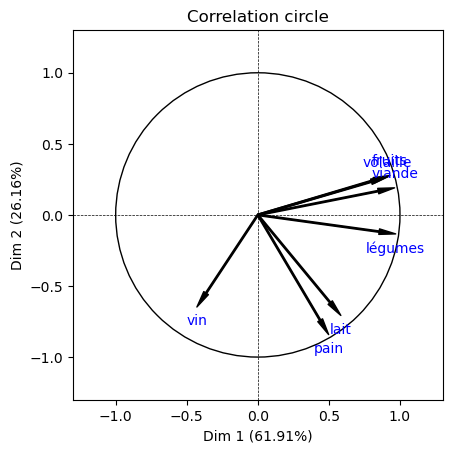

In [67]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2)

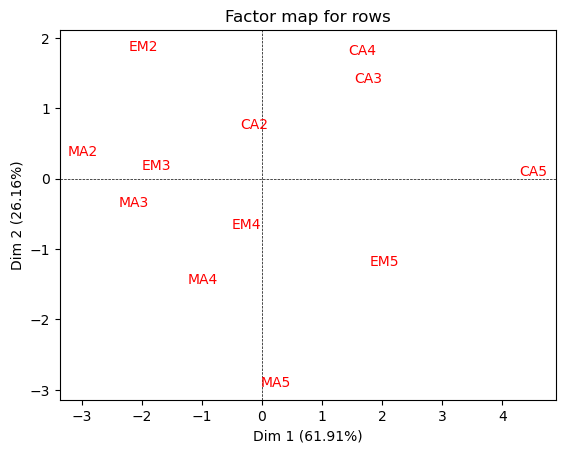

In [69]:
# Mapping des points lignes
my_pca.mapping_row(num_x_axis=1, num_y_axis=2)

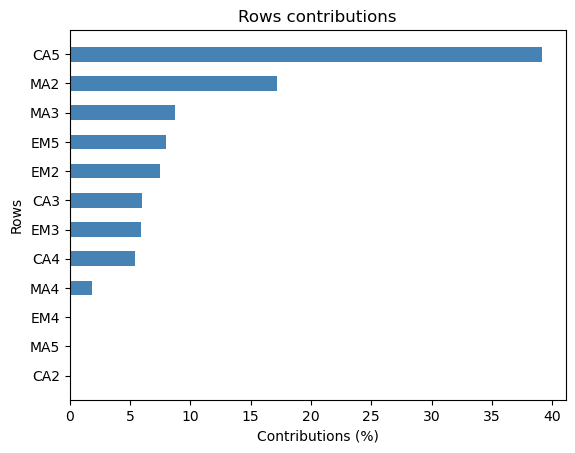

In [70]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_pca.plot_row_contrib(num_axis=1)

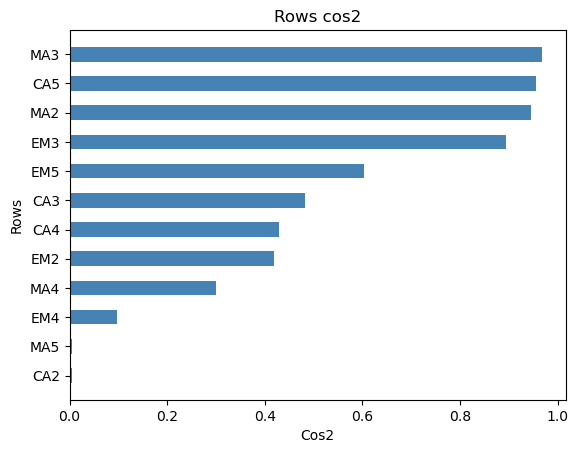

In [71]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_pca.plot_row_cos2(num_axis=1)

Analyse du 1er axe - Points colonnes

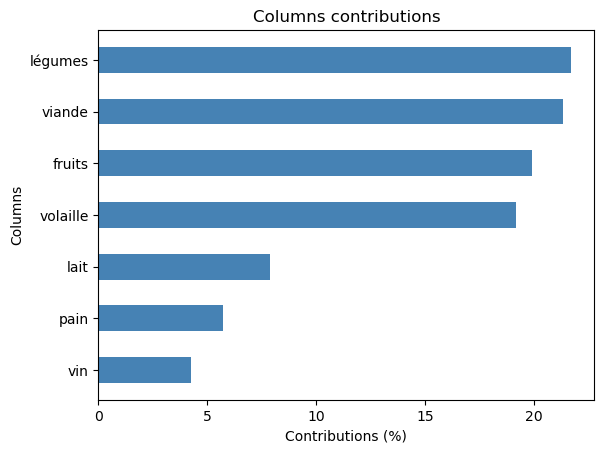

In [72]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_pca.plot_col_contrib(num_axis=1)

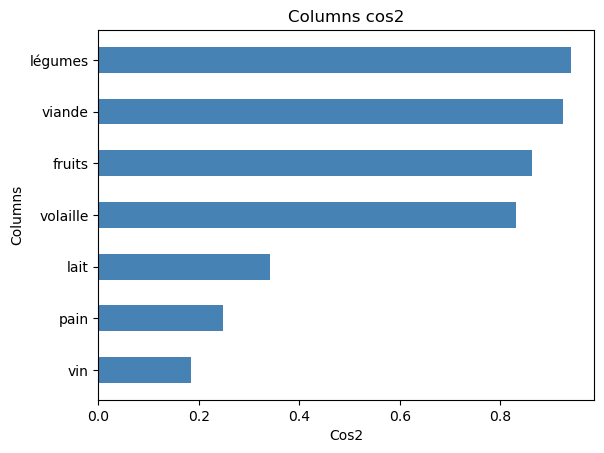

In [73]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_pca.plot_col_cos2(num_axis=1)